## Import libraries

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [455]:
df = pd.read_csv("ftth-en-pays-de-la-loire.csv")

## Learn more about dataset

In [456]:
df.head()

,Code INSEE,code_region,code_departement,Département,siren_epci,EPCI,Logements,Établissements,Locaux raccordables 4eme trimestre 2017,Locaux raccordables 1er trimestre 2018,...,EPCI AMII,Nombre locaux IPE T2 2022 (somme tous OI),Source retenue T2 2022,Meilleure estimation des locaux T2 2022,Zones très denses,Engagements L. 33-13 et AMEL,Intentions privées hors engagement L. 33-13,Commune rurale,OI T2 2022,Locaux raccordables 2eme trimestre 2022
0,44013,52,44,Loire-Atlantique,244400644,CA de la Région Nazairienne et de l'Estuaire (...,"1,302",45,0,0,...,Oui,"1,524",IPE T2 2022 (un IPE),"1,524",0,NaN,0,1,FRTE,"1,404"
1,44020,52,44,Loire-Atlantique,244400404,Nantes Métropole,"8,499",484,"2,658","2,743",...,Oui,"10,434",IPE T2 2022 (un IPE),"10,434",0,NaN,0,0,SFTT,"10,039"
2,44021,52,44,Loire-Atlantique,200071546,CA Pornic Agglo Pays de Retz,"2,381",109,0,0,...,Non,0,INSEE 2018 (IPE moins complet),"2,491",0,0.0,0,1,NaN,0
3,44028,52,44,Loire-Atlantique,244400552,CC du Pays d'Ancenis,"1,732",91,0,0,...,Non,"2,254",IPE T2 2022 (un IPE),"2,252",0,0.0,0,1,FRTE-LOAN,"1,361"
4,44035,52,44,Loire-Atlantique,244400404,Nantes Métropole,"8,608",548,"1,264","1,893",...,Oui,"10,723",IPE T2 2022 (un IPE),"10,723",0,NaN,0,0,FRTE,"9,190"


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Code INSEE                                   1235 non-null   int64  
 1   code_region                                  1235 non-null   int64  
 2   code_departement                             1235 non-null   int64  
 3   Département                                  1235 non-null   object 
 4   siren_epci                                   1235 non-null   object 
 5   EPCI                                         1234 non-null   object 
 6   Logements                                    1235 non-null   object 
 7   Établissements                               1235 non-null   object 
 8   Locaux raccordables 4eme trimestre 2017      1235 non-null   object 
 9   Locaux raccordables 1er trimestre 2018       1235 non-null   object 
 10  

## Clean dataset

Rename columns:

In [458]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('É', 'E')
df.columns = df.columns.str.replace('é', 'e')
df.columns = df.columns.str.replace('Locaux_raccordables_1er_trimestre_', 'raccordables_trim_1_')
df.columns = df.columns.str.replace('Locaux_raccordables_2eme_trimestre_', 'raccordables_trim_2_')
df.columns = df.columns.str.replace('Locaux_raccordables_3eme_trimestre_', 'raccordables_trim_3_')
df.columns = df.columns.str.replace('Locaux_raccordables_4eme_trimestre_', 'raccordables_trim_4_')

Remove commas and change column types for numeric columns:

In [459]:
df = df.replace(',', '', regex=True)

cols = df.loc[:, df.columns.str.startswith("raccordables_trim_")].columns
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
df['Logements'] = df['Logements'].apply(pd.to_numeric, errors='ignore')
df['Etablissements'] = df['Etablissements'].apply(pd.to_numeric, errors='ignore')
df['Nombre_locaux_IPE_T2_2022_(somme_tous_OI)'] = df['Nombre_locaux_IPE_T2_2022_(somme_tous_OI)'].apply(pd.to_numeric, errors='ignore')
df['Meilleure_estimation_des_locaux_T2_2022_'] = df['Meilleure_estimation_des_locaux_T2_2022_'].apply(pd.to_numeric, errors='ignore')

df.head()


,Code_INSEE,code_region,code_departement,Departement,siren_epci,EPCI,Logements,Etablissements,raccordables_trim_4_2017,raccordables_trim_1_2018,...,EPCI_AMII,Nombre_locaux_IPE_T2_2022_(somme_tous_OI),Source_retenue_T2_2022_,Meilleure_estimation_des_locaux_T2_2022_,Zones_très_denses,Engagements_L._33-13_et_AMEL,Intentions_privees_hors_engagement_L._33-13,Commune_rurale,OI_T2_2022,raccordables_trim_2_2022
0,44013,52,44,Loire-Atlantique,244400644,CA de la Région Nazairienne et de l'Estuaire (...,1302,45,0,0,...,Oui,1524,IPE T2 2022 (un IPE),1524,0,NaN,0,1,FRTE,1404
1,44020,52,44,Loire-Atlantique,244400404,Nantes Métropole,8499,484,2658,2743,...,Oui,10434,IPE T2 2022 (un IPE),10434,0,NaN,0,0,SFTT,10039
2,44021,52,44,Loire-Atlantique,200071546,CA Pornic Agglo Pays de Retz,2381,109,0,0,...,Non,0,INSEE 2018 (IPE moins complet),2491,0,0.0,0,1,NaN,0
3,44028,52,44,Loire-Atlantique,244400552,CC du Pays d'Ancenis,1732,91,0,0,...,Non,2254,IPE T2 2022 (un IPE),2252,0,0.0,0,1,FRTE-LOAN,1361
4,44035,52,44,Loire-Atlantique,244400404,Nantes Métropole,8608,548,1264,1893,...,Oui,10723,IPE T2 2022 (un IPE),10723,0,NaN,0,0,FRTE,9190


First we try to vizualize the deployment for each department in 2022

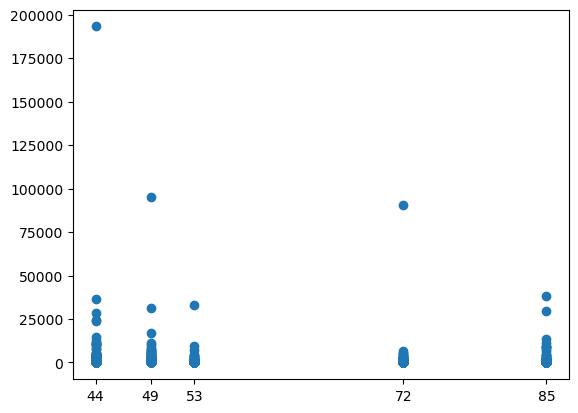

In [460]:
plt.scatter(df['code_departement'], df['raccordables_trim_2_2022'])
x = df['code_departement'].unique()
plt.xticks(x, x)
plt.show()

Observations:
* it does not really make sense to compare the raw data because the different departments do not have the same number of inhabitants
* it would be more relevant to calculate the rate of progress (raccordables / logements)

In [461]:
df['raccordables_trim_2_2022_rate'] = df.raccordables_trim_2_2022 / df.Meilleure_estimation_des_locaux_T2_2022_ * 100

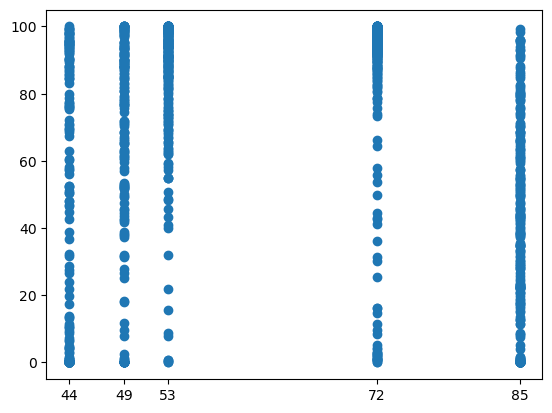

In [462]:
plt.scatter(df['code_departement'], df['raccordables_trim_2_2022_rate'])
x = df['code_departement'].unique()
plt.xticks(x, x)
plt.show()

First observations:
* 49 and 53 seem to be more advanced than the other departments
* 85 has very well distributed data
* 44 and 72 seem to have the majority of municipalities are very well deployed or very few

#### Calculate the mean and the median to confirm/infirm the first observations:

In [469]:
mean_44 = df[df['code_departement'] == 44]['raccordables_trim_2_2022_rate'].mean()
mean_49 = df[df['code_departement'] == 49]['raccordables_trim_2_2022_rate'].mean()
mean_53 = df[df['code_departement'] == 53]['raccordables_trim_2_2022_rate'].mean()
mean_72 = df[df['code_departement'] == 72]['raccordables_trim_2_2022_rate'].mean()
mean_85 = df[df['code_departement'] == 85]['raccordables_trim_2_2022_rate'].mean()
print(f"Mean:\n44={mean_44}\n49={mean_49}\n53={mean_53}\n72={mean_72}\n85={mean_85}\n")

median_44 = df[df['code_departement'] == 44]['raccordables_trim_2_2022_rate'].median()
median_49 = df[df['code_departement'] == 49]['raccordables_trim_2_2022_rate'].median()
median_53 = df[df['code_departement'] == 53]['raccordables_trim_2_2022_rate'].median()
median_72 = df[df['code_departement'] == 72]['raccordables_trim_2_2022_rate'].median()
median_85 = df[df['code_departement'] == 85]['raccordables_trim_2_2022_rate'].median()
print(f"Median:\n44={median_44}\n49={median_49}\n53={median_53}\n72={median_72}\n85={median_85}")

Means:
44=39.56393936717546
49=64.388474749317
53=83.90623086266653
72=86.16038417389302
85=36.53044481075808

Means:
44=21.809466746554822
49=76.75840978593273
53=91.02140236921423
72=95.31876247411907
85=34.86117232260908


Observations:
* 53 and 72 have more than half of their municipalities deployed at 90%



To do:
* quartiles

It will be interesting to observe the same indicators not by municipality but by number of inhabitant 

To do:
* evolutions since 2017